In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [123]:
df_train = pd.read_csv('train.csv')
df_train.head()
df_train.shape

(2056, 13)

In [124]:
df_test = pd.read_csv('test.csv')
df_test.head()
# df_test.shape

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


### Checking for the correaltion of different independent features

#### finding missing values


In [125]:
df_train.isnull().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [126]:
#for non-NA values
df_train.count()

Id                      2056
fixed acidity           2056
volatile acidity        2056
citric acid             2056
residual sugar          2056
chlorides               2056
free sulfur dioxide     2056
total sulfur dioxide    2056
density                 2056
pH                      2056
sulphates               2056
alcohol                 2056
quality                 2056
dtype: int64

In [127]:
df_train.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


In [128]:
df_train['quality'].head(5)
df_train['sulphates'].head(5)

0    0.77
1    0.67
2    0.73
3    0.53
4    1.36
Name: sulphates, dtype: float64

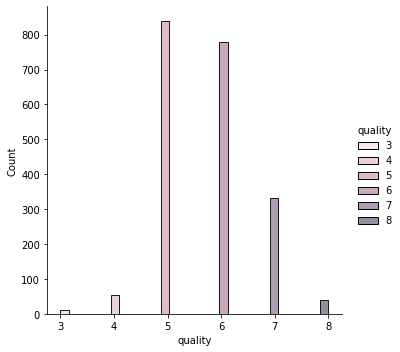

In [129]:

sns.displot(df_train , x = 'quality' , kind = 'hist' , hue='quality')
plt.show()

#### as you can see there are more number of 5 , 6 , 7 outcomes

##### Now let quickly perform splitting of the data and regression without any data analysis

In [130]:
X = df_train.drop(['quality'] , axis=1)
y = df_train.quality
X.head(2)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,8.0,0.5,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1
1,1,9.3,0.3,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8


In [131]:
y.head(2)

0    6
1    6
Name: quality, dtype: int64

In [132]:
df_test.head(1)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.51,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8


#### Finding the Mean Squared Error score 

In [133]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0)
model = xgb.XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None)
model.fit(X,y)

ypred = model.predict(X_test)
mse = mean_squared_error(y_test , ypred)
print("the predicted score by XGBoost is : " , mse)

the predicted score by XGBoost is :  0.2536774090236528


#### Let's do the some feature engineering and ETL :

##### lets find out the correlation of independent features with dependent target value

In [134]:
df_train.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


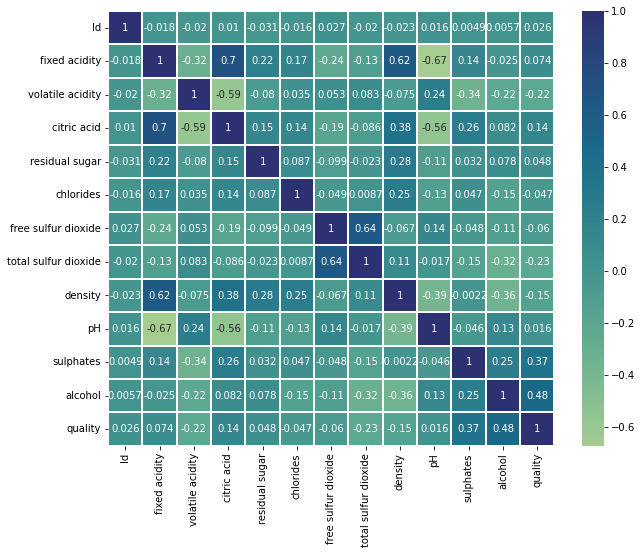

In [135]:
corr = df_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True , cmap='crest' , linewidths=0.3)
plt.show()

In [136]:
selected_features_corr = ['alcohol' , 'sulphates' , 'volatile acidity' ]

In [137]:
selected_features_mir = ['alcohol' , 'sulphates', 'total sulfur dioxide', 'volatile acidity' , 'citric acid', 'density' , 'fixed acidity' ,'ph' , 'chlorides']

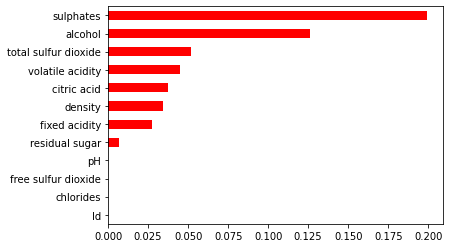

In [138]:
from sklearn.feature_selection import mutual_info_regression

mir = mutual_info_regression(X, y)
plot = pd.Series(mir , df_train.columns[0:len(df_train.columns)-1])
plot = plot.sort_values(ascending=True)
plot.plot(kind='barh' , color='red')
plt.show()

#### performing parameter tunning using randomsearchCV

In [139]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [140]:
'''

XGBRegressor
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
'''

'\n\nXGBRegressor\nXGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=None, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=None, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=100, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=None, ...)\n'

In [141]:
parameters = {
    "learning_rate" : [0.05 , 0.10 , 0.15 , 0.20 , 0.25 , 0.30] ,
    "max_depth" : [3 , 4 , 5, 6, 10 ,12, 13,16 ],
    "min_child_weight" : [1 ,3, 7,9] ,
    "gamma" : [0.0, 0.1 ,0.2 , 0.3,0.4 ],
    "colsample_bytree":[0.3 ,0.5 ,0.7 ,0.9]
}

In [142]:
## performing regression based on selected features from correaltion 
# X = df_train[selected_features_corr]
selected_features_corr
# corr_X = df_train[selected_features_corr]
df_train.head(1)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.5,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6


In [143]:
selected_features_corr
corr_X = df_train[selected_features_corr]
corr_y = y
corr_y
Xtrain_corr , Xtest_corr , ytrain_corr , ytest_corr = train_test_split(corr_X , corr_y , test_size=0.2 , random_state=0)


In [144]:
model.fit(corr_X ,corr_y)
corr_pred = model.predict(Xtest_corr)
corr_mse = mean_squared_error(ytest_corr , ypred)
# X_test.shape
print('the correaltion map selected feature mse score is :' , corr_mse) 

the correaltion map selected feature mse score is : 0.2536774090236528


In [145]:
df_test.head(1)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.51,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8


In [146]:
## finding the selected feature from mutual info regression 

selected_features_mir
mir_X = df_train[selected_features_mir]
test = df_test[selected_features_mir]

mir_y = y
Xtrain_mir , Xtest_mir , ytrain_mir , ytest_mir = train_test_split(mir_X , mir_y , test_size=0.2 , random_state=0)
model.fit(mir_X ,mir_y)
mir_pred = model.predict(test)
mir_score = mean_squared_error(ytest_mir , ypred )
print('the correaltion map selected feature mse score is :' , mir_score) 
ans = mir_pred


the correaltion map selected feature mse score is : 0.2536774090236528


In [147]:
df_test.head(1)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.51,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8


In [148]:
# from sklearn.model_selection import RandomizedSearchCV , GridSearchCV

# random_search = RandomizedSearchCV(model ,param_distributions=parameters ,n_iter=5 , scoring='r2' ,n_jobs=-1 , cv=5 ,verbose=3 )


In [149]:
# random_search.fit(mir_X , mir_y)

In [150]:
# random_search.best_estimator_

In [151]:
# random_search.best_params_

sklearn.metrics.get_scorer_names()

In [152]:
from sklearn.metrics import get_scorer_names
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [153]:
from sklearn.metrics import r2_score

r2_score_for_corr= r2_score(ytest_corr , ypred)
print("the r2score is for corr is :" , r2_score_for_corr)

the r2score is for corr is : 0.6299269645114052


In [154]:
r2_score_for_mir= r2_score(ytest_mir , ypred)
print("the r2score is for mir is :" , r2_score_for_mir)

the r2score is for corr is : 0.6299269645114052


In [155]:
## the model was trained on the train dataset and tested on test dataset 

# selected_features_mir
# mir_X = df_train[selected_features_mir]
# df_test = df_test[selected_features_mir]
# mir_y = y
# Xtrain_mir , Xtest_mir , ytrain_mir , ytest_mir = train_test_split(mir_X , mir_y , test_size=0.2 , random_state=0)
# model.fit(mir_X ,mir_y)
# mir_pred = model.predict(df_test)
# mir_score = mean_squared_error(ytest_mir , ypred )
# print('the correaltion map selected feature mse score is :' , mir_score) a

In [156]:
# newans = ans.astype(int)
newans= (np.rint(ans)).astype(int)
newans

array([5, 6, 6, ..., 5, 5, 6])

In [157]:
# ans.to_csv('submission.csv',index='False')
new_res=pd.DataFrame({'Id':df_test.Id,'quality':newans})
# df_test.head(1)
new_res = new_res.reset_index(drop=True)
new_res

,Id,quality
0,2056,5
1,2057,6
2,2058,6
3,2059,6
4,2060,6
...,...,...
1367,3423,6
1368,3424,6
1369,3425,5
1370,3426,5


In [158]:
new_res.shape

(1372, 2)

In [159]:
new_res.to_csv('submission2.csv' ,index='False' )
